In [2]:
import os
from glob import glob # 전체 경로에서 한번에 리스트로 불러오게 하는 라이브러리

import numpy as np

import tensorflow as tf
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 폴더를 리스트형식으로 나타내줌
os.listdir('../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/mnist_png/training')
# /Users/ichanghwan/Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/mnist_png

['9', '0', '7', '6', '1', '8', '4', '3', '2', '5']

In [6]:
# 해당 경로에 있는 해당 파일을 가져옴
data_paths = glob('../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/mnist_png/training/*/*.png')

In [7]:
len(data_paths)

60000

In [40]:
path = data_paths[0]
path

'../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/mnist_png/training/9/36655.png'

# 데이터 분석 (MNIST)

In [31]:
label_nums = os.listdir('../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/mnist_png/training')
label_nums.sort()
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Label 0의 데이터 갯수 확인

In [12]:
len(label_nums)

10

### 데이터 별 갯수 비교

In [32]:
nums_dataset = []

for lbl_n in label_nums:
    data_per_class = os.listdir('../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/mnist_png/training/' + lbl_n)
    nums_dataset.append(len(data_per_class))

In [33]:
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [34]:
nums_dataset

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

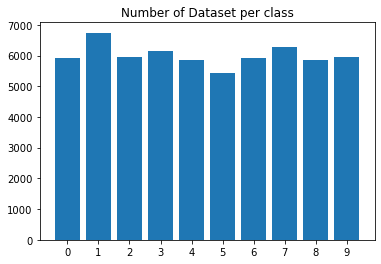

In [35]:
# bar로 시각화
plt.bar(label_nums, nums_dataset)
plt.title('Number of Dataset per class')
plt.show()

# Pillow로 열기

In [36]:
path

'../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/mnist_png/training/9/36655.png'

In [49]:
image_pil = Image.open(path)
image = np.array(image_pil)

In [50]:
image.shape

(28, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

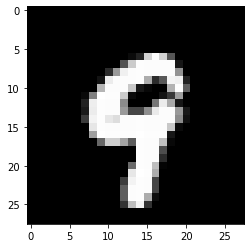

In [51]:
plt.imshow(image,'gray')
plt.show

# TensorFlow로 열기

In [52]:
gfile = tf.io.read_file(path)
image1 = tf.io.decode_image(gfile)

In [53]:
# tensor로 넣기 위해서는 채널이 필수
image1.shape

TensorShape([28, 28, 1])

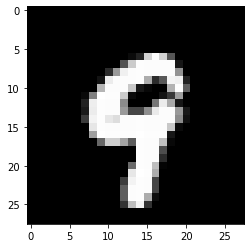

In [55]:
plt.imshow(image1[:,:,0],'gray')
plt.show()

# Label 얻기

In [56]:
path

'../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/mnist_png/training/9/36655.png'

In [65]:
# 폴더명 가져오기
# path.split('/')
label = path.split('/')[-2]

In [66]:
int(label)

9

In [67]:
# 함수로 만들기
def get_label(path):
    class_name = path.split('/')[-2]
    label =int(class_name)
    return label

In [69]:
get_label(path)

9

# 데이터 이미지 사이즈 알기

In [70]:
# 작업 실행 상황을 보여줌
from tqdm import tqdm_notebook

In [71]:
heights = []
widths = []

In [75]:
data_paths[:10]

['../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/mnist_png/training/9/36655.png',
 '../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/mnist_png/training/9/32433.png',
 '../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/mnist_png/training/9/28319.png',
 '../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/mnist_png/training/9/4968.png',
 '../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/mnist_png/training/9/23502.png',
 '../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이

In [76]:
len(data_paths)

60000

In [81]:
img_pil = Image.open(path)
image =np.array(img_pil)
image.shape

(28, 28)

In [82]:
h, w = image.shape

In [84]:
for path in tqdm_notebook(data_paths):
    img_pil = Image.open(path)
    image =np.array(img_pil)
    h, w = image.shape

    heights.append(h)
    widths.append(h)

In [85]:
# 어떤 값이 있는지 확인
np.unique(heights)

array([28])

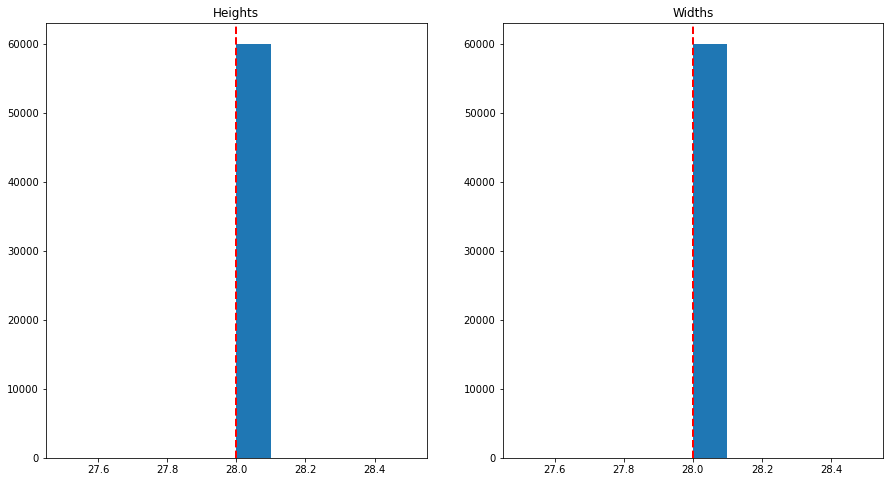

In [88]:
# 시각적으로 확인
plt.figure(figsize=(15,8))

plt.subplot(121)
plt.hist(heights)
plt.title('Heights')
plt.axvline(np.mean(heights), color='r', linestyle='dashed', linewidth=2) # 평균값으로 수직선 그리기

plt.subplot(122)
plt.hist(widths)
plt.axvline(np.mean(widths), color='r', linestyle='dashed', linewidth=2)
plt.title('Widths')

plt.show()